# Importing and Cleaning

In [1]:
# get some imports taken care of

import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# get the datasets as DataFrames

expenses_file = 'https://raw.githubusercontent.com/spaghettiplants/college_sports_teams/main/csv_files/Athletics_Expenses.csv'
expenses_df = pd.read_csv(expenses_file)

revenue_file = 'https://raw.githubusercontent.com/spaghettiplants/college_sports_teams/main/csv_files/Athletics_Revenue.csv'
revenue_df = pd.read_csv(revenue_file)

In [2]:
# hey look it worked
expenses_df.head()

,Survey Year,UNITID,Institution Name,State CD,Classification Name,Classification Other,Sanction Code,Sanction Name,Male Undergraduates,Female Undergraduates,...,Wrestling Total Expenses,Other Sports Men's Team Expenses,Other Sports Women's Team Expenses,Other Sports Coed Team Expenses,Other Sports Total Expenses,Total Men's Team Expenses,Total Women's Team Expenses,Total Coed Team Expenses,Not Allocated by Gender/Sport Expenses,Grand Total Expenses
0,2018,197869,Appalachian State University,NC,NCAA Division I-FBS,NaN,1,NCAA,7211,9146,...,598417.0,NaN,NaN,NaN,NaN,14776070,6090279,NaN,7615814,28482163
1,2018,104151,Arizona State University-Tempe,AZ,NCAA Division I-FBS,NaN,1,NCAA,21732,17473,...,1775421.0,NaN,997834.0,NaN,997834.0,48986261,20200537,NaN,29355113,98541911
2,2018,100858,Auburn University,AL,NCAA Division I-FBS,NaN,1,NCAA,11183,11053,...,NaN,NaN,NaN,NaN,NaN,68777805,22670162,NaN,41166122,132614089
3,2018,150136,Ball State University,IN,NCAA Division I-FBS,NaN,1,NCAA,5922,8662,...,NaN,NaN,NaN,NaN,NaN,11811852,7764560,NaN,8335239,27911651
4,2018,196079,Binghamton University,NY,NCAA Division I without football,NaN,1,NCAA,6826,6801,...,607027.0,NaN,NaN,NaN,NaN,5433944,4806949,NaN,5395613,15636506


In [3]:
revenue_df.head()

,Survey Year,UNITID,Institution Name,State CD,Classification Name,Classification Other,Sanction Code,Sanction Name,Male Undergraduates,Female Undergraduates,...,Wrestling Total Revenue,Other Sports Men's Team Revenue,Other Sports Women's Team Revenue,Other Sports Coed Team Revenue,Other Sports Total Revenue,Total Men's Team Revenue,Total Women's Team Revenue,Total Coed Team Revenue,Not Allocated by Gender/Sport Revenue,Grand Total Revenue
0,2018,197869,Appalachian State University,NC,NCAA Division I-FBS,NaN,1,NCAA,7211,9146,...,598417.0,NaN,NaN,NaN,NaN,14776070,6090279,NaN,7615814,28482163
1,2018,104151,Arizona State University-Tempe,AZ,NCAA Division I-FBS,NaN,1,NCAA,21732,17473,...,565724.0,NaN,262788.0,NaN,262788.0,56359334,4229545,NaN,41247482,101836361
2,2018,100858,Auburn University,AL,NCAA Division I-FBS,NaN,1,NCAA,11183,11053,...,NaN,NaN,NaN,NaN,NaN,112270358,2510282,NaN,37674778,152455418
3,2018,150136,Ball State University,IN,NCAA Division I-FBS,NaN,1,NCAA,5922,8662,...,NaN,NaN,NaN,NaN,NaN,11811852,7764560,NaN,8335239,27911651
4,2018,196079,Binghamton University,NY,NCAA Division I without football,NaN,1,NCAA,6826,6801,...,607027.0,NaN,NaN,NaN,NaN,5622423,4806949,NaN,6487875,16917247


In [4]:
# replace NaNs with 0 for math purposes
expenses_df = expenses_df.fillna(0)
revenue_df = revenue_df.fillna(0)

## Gendered Revenue and Expenses

In [5]:
# Subtract the coed revenue column from the total revenue column for each sport
# to create a new gendered team's total revenue column

# Get list of revenues
revenue_column_names = list(revenue_df.columns.values)

# Get list of coed revenues
coed_revenue_headers = revenue_column_names[13:-7:4]

# Get list of total revenues to subtract coed from
total_revenue_headers = revenue_column_names[14:-6:4]

# Turn them into dataframes and merge them
coed_revenue_df = revenue_df[coed_revenue_headers]
total_revenue_df = revenue_df[total_revenue_headers]

coed_total_revenue_df = pd.merge(coed_revenue_df, total_revenue_df, left_index = True,
                                 right_index = True)

## Create a list of new column names for the gendered revenue for each sport,
## the sport total revenue - the sport coed revenue.

gendered_team_revenues_headers = ['Gendered Archery Teams Revenue',
                          'Gendered Badminton Teams Revenue',
                          'Gendered Baseball Teams Revenue',
                          'Gendered Basketball Teams Revenue',
                          'Gendered Beach Volleyball Teams Revenue',
                          'Gendered Bowling Teams Revenue',
                          'Gendered Track Teams Revenue',
                          'Gendered Diving Teams Revenue',
                          'Gendered Equestrian Teams Revenue',
                          'Gendered Fencing Teams Revenue',
                          'Gendered Field Hockey Teams Revenue',
                          'Gendered Football Teams Revenue',
                          'Gendered Golf Teams Revenue',
                          'Gendered Gymnastics Teams Revenue',
                          'Gendered Ice Hockey Teams Revenue',
                          'Gendered Lacrosse Teams Revenue',
                          'Gendered Rifle Teams Revenue',
                          'Gendered Rodeo Teams Revenue',
                          'Gendered Rowing Teams Revenue',
                          'Gendered Sailing Teams Revenue',
                          'Gendered Skiing Teams Revenue',
                          'Gendered Soccer Teams Revenue',
                          'Gendered Softball Teams Revenue',
                          'Gendered Squash Teams Revenue',
                          'Gendered Swimming and Diving Teams Revenue',
                          'Gendered Swimming Teams Revenue',
                          'Gendered Synchronized Swimming Teams Revenue',
                          'Gendered Table Tennis Teams Revenue',
                          'Gendered Team Handball Teams Revenue',
                          'Gendered Tennis Teams Revenue',
                          'Gendered T&F Indoor Teams Revenue',
                          'Gendered T&F Outdoor Teams Revenue',
                          'Gendered T&F X Country Teams Revenue',
                          'Gendered Volleyball Teams Revenue',
                          'Gendered Water Polo Teams Revenue',
                          'Gendered Weight Lifting Teams Revenue',
                          'Gendered Wrestling Teams Revenue']

# long list above

## Iterate through the headers and the combined DataFrame
## by column, increasing the column count (move to the right) by one
## each time. Subtract the 2 values, and create a new column with the
## column header being a gendered sport revenue and the value being the difference.

column = 0
for gendered_team in gendered_team_revenues_headers:
  coed_total_revenue_df[gendered_team] = coed_total_revenue_df['{}'.format(total_revenue_headers[column])] - coed_total_revenue_df['{}'.format(coed_revenue_headers[column])]
  column += 1

# Create df with just the new gendered team revenues
gendered_revenues_df = coed_total_revenue_df[gendered_team_revenues_headers]

In [6]:
# Subtract the coed expenses column from the total revenue column for each sport
# to create a new gendered team's total expenses column

# Get list of expenses
expenses_column_names = list(expenses_df.columns.values)

# Get list of coed expenses
coed_expenses_headers = expenses_column_names[13:-8:4]

# Get list of total expenses to subtract coed from
total_expenses_headers = expenses_column_names[14:-7:4]

# Turn them into dataframes and merge them
coed_expenses_df = expenses_df[coed_expenses_headers]
total_expenses_df = expenses_df[total_expenses_headers]

coed_total_expenses_df = pd.merge(coed_expenses_df, total_expenses_df, left_index = True,
                                 right_index = True)

## Create a list of new column names for the gendered expenses for each sport,
## the sport total expenses - the sport coed expenses.

gendered_team_expenses_headers = ['Gendered Archery Teams Expenses',
                          'Gendered Badminton Teams Expenses',
                          'Gendered Baseball Teams Expenses',
                          'Gendered Basketball Teams Expenses',
                          'Gendered Beach Volleyball Teams Expenses',
                          'Gendered Bowling Teams Expenses',
                          'Gendered Track Teams Expenses',
                          'Gendered Diving Teams Expenses',
                          'Gendered Equestrian Teams Expenses',
                          'Gendered Fencing Teams Expenses',
                          'Gendered Field Hockey Teams Expenses',
                          'Gendered Football Teams Expenses',
                          'Gendered Golf Teams Expenses',
                          'Gendered Gymnastics Teams Expenses',
                          'Gendered Ice Hockey Teams Expenses',
                          'Gendered Lacrosse Teams Expenses',
                          'Gendered Rifle Teams Expenses',
                          'Gendered Rodeo Teams Expenses',
                          'Gendered Rowing Teams Expenses',
                          'Gendered Sailing Teams Expenses',
                          'Gendered Skiing Teams Expenses',
                          'Gendered Soccer Teams Expenses',
                          'Gendered Softball Teams Expenses',
                          'Gendered Squash Teams Expenses',
                          'Gendered Swimming and Diving Teams Expenses',
                          'Gendered Swimming Teams Expenses',
                          'Gendered Synchronized Swimming Teams Expenses',
                          'Gendered Table Tennis Teams Expenses',
                          'Gendered Team Handball Teams Expenses',
                          'Gendered Tennis Teams Expenses',
                          'Gendered T&F Indoor Teams Expenses',
                          'Gendered T&F Outdoor Teams Expenses',
                          'Gendered T&F X Country Teams Expenses',
                          'Gendered Volleyball Teams Expenses',
                          'Gendered Water Polo Teams Expenses',
                          'Gendered Weight Lifting Teams Expenses',
                          'Gendered Wrestling Teams Expenses']

# long list above

## Iterate through the headers and the combined DataFrame
## by column, increasing the column count (move to the right) by one
## each time. Subtract the 2 values, and create a new column with the
## column header being a gendered sport expenses and the value being the difference.

column = 0
for gendered_team in gendered_team_expenses_headers:
  coed_total_expenses_df[gendered_team] = coed_total_expenses_df['{}'.format(total_expenses_headers[column])] - coed_total_expenses_df['{}'.format(coed_expenses_headers[column])]
  column += 1

# Create df with just the new gendered team revenues
gendered_expenses_df = coed_total_expenses_df[gendered_team_expenses_headers]

In [7]:
# We'll now combine the two DataFrames and also merge with the
# university names, year, mens exp/rev, and women's exp/rev information.

gendered_rev_and_exp_df = pd.merge(gendered_revenues_df, gendered_expenses_df,
                                   left_index = True, right_index = True)
gendered_rev_and_exp_df = pd.merge(expenses_df['Institution Name'], gendered_rev_and_exp_df,
                                   left_index = True, right_index = True)
gendered_rev_and_exp_df = pd.merge(expenses_df['Survey Year'], gendered_rev_and_exp_df,
                                   left_index = True, right_index = True)

# grabbing men's expenses and revenues
mens_expenses_headers = expenses_column_names[11:-10:4]
mens_expenses_df = expenses_df[mens_expenses_headers]

mens_revenues_headers = revenue_column_names[11:-10:4]
mens_revenues_df = revenue_df[mens_revenues_headers]

# grabbing women's expenses and revenues
womens_expenses_headers = expenses_column_names[12:-10:4]
womens_expenses_df = expenses_df[womens_expenses_headers]

womens_revenues_headers = revenue_column_names[12:-10:4]
womens_revenues_df = revenue_df[womens_revenues_headers]

# merge both men's and women's exp/rev information

gendered_rev_and_exp_df = pd.merge(gendered_rev_and_exp_df, mens_expenses_df,
                                   left_index = True, right_index = True)
gendered_rev_and_exp_df = pd.merge(gendered_rev_and_exp_df, mens_revenues_df,
                                   left_index = True, right_index = True)
gendered_rev_and_exp_df = pd.merge(gendered_rev_and_exp_df, womens_expenses_df,
                                   left_index = True, right_index = True)
gendered_rev_and_exp_df = pd.merge(gendered_rev_and_exp_df, womens_revenues_df,
                                   left_index = True, right_index = True)

## Revenue and Expenses Sum by Year

In [8]:
# Separate the revenue and expenses dataframe by year

df_2010 = gendered_rev_and_exp_df[gendered_rev_and_exp_df['Survey Year'] == 2010]
df_2011 = gendered_rev_and_exp_df[gendered_rev_and_exp_df['Survey Year'] == 2011]
df_2012 = gendered_rev_and_exp_df[gendered_rev_and_exp_df['Survey Year'] == 2012]
df_2013 = gendered_rev_and_exp_df[gendered_rev_and_exp_df['Survey Year'] == 2013]
df_2014 = gendered_rev_and_exp_df[gendered_rev_and_exp_df['Survey Year'] == 2014]
df_2015 = gendered_rev_and_exp_df[gendered_rev_and_exp_df['Survey Year'] == 2015]
df_2016 = gendered_rev_and_exp_df[gendered_rev_and_exp_df['Survey Year'] == 2016]
df_2017 = gendered_rev_and_exp_df[gendered_rev_and_exp_df['Survey Year'] == 2017]
df_2018 = gendered_rev_and_exp_df[gendered_rev_and_exp_df['Survey Year'] == 2018]

In [9]:
# For each year, we're going to sum all of the expenses and revenue for each college gendered sport team.
# We'll get rid of the unecessary columns first, the survey year and the name of the colleges since they won't sum.

# get rid of unecessary columns
clean_2010 = df_2010[df_2010.columns[~df_2010.columns.isin(['Survey Year', 'Institution Name'])]]
clean_2011 = df_2011[df_2011.columns[~df_2011.columns.isin(['Survey Year', 'Institution Name'])]]
clean_2012 = df_2012[df_2012.columns[~df_2012.columns.isin(['Survey Year', 'Institution Name'])]]
clean_2013 = df_2013[df_2013.columns[~df_2013.columns.isin(['Survey Year', 'Institution Name'])]]
clean_2014 = df_2014[df_2014.columns[~df_2014.columns.isin(['Survey Year', 'Institution Name'])]]
clean_2015 = df_2015[df_2015.columns[~df_2015.columns.isin(['Survey Year', 'Institution Name'])]]
clean_2016 = df_2016[df_2016.columns[~df_2016.columns.isin(['Survey Year', 'Institution Name'])]]
clean_2017 = df_2017[df_2017.columns[~df_2017.columns.isin(['Survey Year', 'Institution Name'])]]
clean_2018 = df_2018[df_2018.columns[~df_2018.columns.isin(['Survey Year', 'Institution Name'])]]

# append row with the sum for each column
clean_2010.append(clean_2010.sum(), ignore_index = True)
clean_2011.append(clean_2011.sum(), ignore_index = True)
clean_2012.append(clean_2012.sum(), ignore_index = True)
clean_2013.append(clean_2013.sum(), ignore_index = True)
clean_2014.append(clean_2014.sum(), ignore_index = True)
clean_2015.append(clean_2015.sum(), ignore_index = True)
clean_2016.append(clean_2016.sum(), ignore_index = True)
clean_2017.append(clean_2017.sum(), ignore_index = True)
clean_2018.append(clean_2018.sum(), ignore_index = True)

# grab that last row
sum_2010 = clean_2010.tail(1)
sum_2011 = clean_2011.tail(1)
sum_2012 = clean_2012.tail(1)
sum_2013 = clean_2013.tail(1)
sum_2014 = clean_2014.tail(1)
sum_2015 = clean_2015.tail(1)
sum_2016 = clean_2016.tail(1)
sum_2017 = clean_2017.tail(1)
sum_2018 = clean_2018.tail(1)

In [10]:
sum_2010

,Gendered Archery Teams Revenue,Gendered Badminton Teams Revenue,Gendered Baseball Teams Revenue,Gendered Basketball Teams Revenue,Gendered Beach Volleyball Teams Revenue,Gendered Bowling Teams Revenue,Gendered Track Teams Revenue,Gendered Diving Teams Revenue,Gendered Equestrian Teams Revenue,Gendered Fencing Teams Revenue,...,Table Tennis Women's Team Revenue,Team Handball Women's Team Revenue,Tennis Women's Team Revenue,Track and Field Indoor Women's Team Revenue,Track and Field Outdoor Women's Team Revenue,Track and Field X Country Women's Team Revenue,Volleyball Women's Team Revenue,Water Polo Women's Team Revenue,Weight Lifting Women's Team Revenue,Wrestling Women's Team Revenue
1519,0.0,0.0,0.0,1135833.0,0.0,0.0,464380.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,474030.0,0.0,0.0,0.0


# Creating Metrics

## Sum by Year

In [11]:
# we'll get the sums by year first
expenses_sum = expenses_df.groupby(['Survey Year']).sum()
revenue_sum = revenue_df.groupby(['Survey Year']).sum()

# then merge the 2 dataframes into one.
# here we have all team expenses and revenues by gender, coed, and total
exp_and_rev_sum = pd.merge(expenses_sum,
                           revenue_sum,
                           left_index = True,
                           right_index = True)

In [12]:
# Let's start by taking a peek at what we have

exp_and_rev_sum

,UNITID_x,Classification Other_x,Sanction Code_x,Male Undergraduates_x,Female Undergraduates_x,Total Undergraduates_x,Archery Men's Team Expenses,Archery Women's Team Expenses,Archery Coed Team Expenses,Archery Total Expenses,...,Wrestling Total Revenue,Other Sports Men's Team Revenue,Other Sports Women's Team Revenue,Other Sports Coed Team Revenue,Other Sports Total Revenue,Total Men's Team Revenue,Total Women's Team Revenue,Total Coed Team Revenue,Not Allocated by Gender/Sport Revenue,Grand Total Revenue
Survey Year,,,,,,,,,,,,,,,,,,,,,
2010,30045250,0.0,169,1420615,1542891,2963506,0.0,0.0,0.0,0.0,...,17050955.0,811925.0,590309.0,73252.0,1475486.0,3464811137,597411565,1187945.0,1889865144,5953275791
2011,30045250,0.0,169,1447803,1571869,3019672,0.0,0.0,0.0,0.0,...,19550118.0,782797.0,517497.0,101943.0,1402237.0,3771350206,714984105,1035155.0,1809581350,6296950816
2012,30045250,0.0,169,1463342,1586208,3049550,0.0,0.0,0.0,0.0,...,21592452.0,732395.0,484217.0,89341.0,1305953.0,4019327598,754555565,2021979.0,1912872605,6688777747
2013,30527930,0.0,170,1479197,1601741,3080938,0.0,0.0,0.0,0.0,...,22315644.0,1183251.0,867534.0,111569.0,2162354.0,4244432098,794213913,2414825.0,2020229467,7061290303
2014,30527930,0.0,170,1499666,1632652,3132318,0.0,0.0,0.0,0.0,...,23792873.0,826164.0,650454.0,25390.0,1502008.0,4547965213,803487939,2692739.0,2225528595,7579674486
2015,31014770,0.0,170,1537479,1680191,3217670,0.0,0.0,0.0,0.0,...,25717486.0,643215.0,766853.0,9032.0,1419100.0,4902929278,892917364,2726841.0,2307719935,8106293418
2016,30528352,0.0,168,1547536,1701924,3249460,0.0,0.0,0.0,0.0,...,26464886.0,826607.0,921643.0,15257.0,1763507.0,5176644660,958550982,3413436.0,2454898093,8593507171
2017,31014770,0.0,170,1575151,1744335,3319486,0.0,0.0,0.0,0.0,...,31323147.0,1425186.0,1004884.0,15074.0,2445144.0,5534036678,1010443688,3893374.0,2695338024,9243711764
2018,31014770,0.0,170,1576656,1768718,3345374,0.0,0.0,0.0,0.0,...,31578149.0,635283.0,948083.0,44522.0,1627888.0,5731183650,1102742450,4215015.0,2627502272,9465643387


## Next Steps
It's time for some operations. Here's what we'll do.

1.   Get rid of the sports where there zero for expenses or revenue for all years for either men's or women's teams.
2.   Subtract the coed from the total to create a new gendered total for each sport, both for expenses and revenue.
3.   Divide each gendered team's expenses and revenue by the new gendered total.
4.   Create the expenses to revenue ratios for each gendered team. This will be the set of values used for our hypothesis testing.

The last time I tried did I was able to complete it using brute force. Selecting the group of column headers, iterating through those as lists in order and performing the operation with the other group of column headers. There should be a way to do this with melt or pivot. Let's figure it out.

## Zero Columns

In [13]:
# drop the columns we won't be using at all using an index
indices = [0, 1, 2, 3, 4, 5, 325, 324, 323, 322, 321, 320, 319, 318, 317]
unused_variables = []
for index in indices:
    unused_variables.append(list(exp_and_rev_sum.columns)[index])

exp_and_rev_sum = exp_and_rev_sum.drop(columns = unused_variables, axis = 1)

**This is how I did the first time lol**
Okay. Before we perform the operations, let's get rid of the non-numerical columns, as well as the Other sports teams and last few columns that we won't using in our calculations.

<code>categoricals = ['UNITID_x', 'Classification Other_x', 'Sanction Code_x', 'Male Undergraduates_x',
               'Female Undergraduates_x', 'Total Undergraduates_x', "Other Sports Men's Team Revenue",
               "Other Sports Women's Team Revenue", "Other Sports Coed Team Revenue",
               "Other Sports Total Revenue", "Total Men's Team Revenue", "Total Women's Team Revenue",
               "Total Coed Team Revenue", "Not Allocated by Gender/Sport Revenue", "Grand Total Revenue",
               "Other Sports Men's Team Expenses", "Other Sports Women's Team Expenses",
               'Other Sports Coed Team Expenses', 'Other Sports Total Expenses', "Total Men's Team Expenses",
               "Total Women's Team Expenses", 'Total Coed Team Expenses', 'Not Allocated by Gender/Sport Expenses',
               'Grand Total Expenses', 'UNITID_y', 'Classification Other_y', 'Sanction Code_y',
               'Male Undergraduates_y', 'Female Undergraduates_y', 'Total Undergraduates_y']
exp_and_rev_sum = exp_and_rev_sum.drop(columns = categoricals, axis = 1)</code>

<img src="images/phew.png" style = "width:150px;" align = "left">

In [14]:
exp_and_rev_sum

,Archery Men's Team Expenses,Archery Women's Team Expenses,Archery Coed Team Expenses,Archery Total Expenses,Badminton Men's Team Expenses,Badminton Women's Team Expenses,Badminton Coed Team Expenses,Badminton Total Expenses,Baseball Men's Team Expenses,Baseball Women's Team Expenses,...,Water Polo Coed Team Revenue,Water Polo Total Revenue,Weight Lifting Men's Team Revenue,Weight Lifting Women's Team Revenue,Weight Lifting Coed Team Revenue,Weight Lifting Total Revenue,Wrestling Men's Team Revenue,Wrestling Women's Team Revenue,Wrestling Coed Team Revenue,Wrestling Total Revenue
Survey Year,,,,,,,,,,,,,,,,,,,,,
2010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,156406650.0,0.0,...,0.0,6407869.0,33536.0,31059.0,0.0,64595.0,17050955.0,0.0,0.0,17050955.0
2011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,170593637.0,0.0,...,0.0,7940382.0,35263.0,35523.0,0.0,70786.0,19541791.0,8327.0,0.0,19550118.0
2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180221216.0,0.0,...,0.0,6591892.0,19938.0,14687.0,0.0,34625.0,21592452.0,0.0,0.0,21592452.0
2013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202943310.0,0.0,...,0.0,6777331.0,40275.0,29310.0,0.0,69585.0,22315644.0,0.0,0.0,22315644.0
2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,211130966.0,0.0,...,0.0,7459971.0,22312.0,23039.0,0.0,45351.0,23792873.0,0.0,0.0,23792873.0
2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,226994171.0,0.0,...,0.0,8623726.0,35230.0,35978.0,0.0,71208.0,25717486.0,0.0,0.0,25717486.0
2016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,244204286.0,0.0,...,0.0,8438581.0,0.0,0.0,0.0,0.0,26464886.0,0.0,0.0,26464886.0
2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,256371009.0,0.0,...,0.0,9467665.0,33518.0,33974.0,0.0,67492.0,31323147.0,0.0,0.0,31323147.0
2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,274478756.0,0.0,...,0.0,10069569.0,55189.0,55326.0,0.0,110515.0,31578149.0,0.0,0.0,31578149.0


In [15]:
# Let's drop the columns that have a value of zero for all years. 
# Additionally, for each one, I'm going to go through manually and if the
# column is specifically men's or women's, then I'm going to remove the corresponding
# columns for that sport type since that means that, for that sport, we can't compare
# men's and women's team since one doesn't exist. Keeping the columns would introduce some bias
# since we may have more sports that have a men's team but not a women's team, or vice versa.
all_zero = exp_and_rev_sum.columns[(exp_and_rev_sum == 0).all()]

# Let's look at a list of these columns that have all zeros.

list(all_zero)

["Archery Men's Team Expenses",
 "Archery Women's Team Expenses",
 'Archery Coed Team Expenses',
 'Archery Total Expenses',
 "Badminton Men's Team Expenses",
 "Badminton Women's Team Expenses",
 'Badminton Coed Team Expenses',
 'Badminton Total Expenses',
 "Baseball Women's Team Expenses",
 'Baseball Coed Team Expenses',
 'Basketball Coed Team Expenses',
 'Beach Volleyball Coed Team Expenses Expenses',
 "Bowling Men's Team Expenses",
 'Bowling Coed Team Expenses',
 'All Track Combined Coed Team Expenses',
 'Diving Coed Team Expenses',
 "Equestrian Men's Team Expenses",
 'Equestrian Coed Team Expenses',
 'Fencing Coed Team Expenses',
 "Field Hockey Men's Team Expenses",
 'Field Hockey Coed Team Expenses',
 "Football Women's Team Expenses",
 'Football Coed Team Expenses',
 'Golf Coed Team Expenses',
 'Gymnastics Coed Team Expenses',
 'Ice Hockey Coed Team Expenses',
 'Lacrosse Coed Team Expenses',
 "Rifle Men's Team Expenses",
 'Rodeo Coed Team Expenses',
 'Rowing Coed Team Expenses',
 '

In [16]:
# how many is that?
len(list(all_zero))

105

In [17]:
# okay let's make a list of the ones we actually want to drop
all_zero_to_drop = ["Archery Men's Team Expenses",
                   "Archery Women's Team Expenses",
                   'Archery Coed Team Expenses',
                   'Archery Total Expenses',
                   "Badminton Men's Team Expenses",
                   "Badminton Women's Team Expenses",
                   'Badminton Coed Team Expenses',
                   'Badminton Total Expenses',
                    "Baseball Men's Team Expenses",
                   "Baseball Women's Team Expenses",
                   'Baseball Coed Team Expenses',
                   "Baseball Total Expenses",
                   "Bowling Men's Team Expenses",
                   "Bowling Women's Team Expenses",
                   'Bowling Coed Team Expenses',
                   "Bowling Total Expenses",
                   "Equestrian Men's Team Expenses",
                   "Equestrian Women's Team Expenses",
                   'Equestrian Coed Team Expenses',
                   "Equestrian Total Expenses",
                   "Field Hockey Men's Team Expenses",
                   "Field Hockey Women's Team Expenses",
                   'Field Hockey Coed Team Expenses',
                   "Field Hockey Total Expenses",
                   "Football Men's Team Expenses",
                   "Football Women's Team Expenses",
                   'Football Coed Team Expenses',
                   "Football Total Expenses",
                   "Rifle Men's Team Expenses",
                   "Rifle Women's Team Expenses",
                   "Rifle Coed Team Expenses",
                   "Rifle Total Expenses",
                   "Softball Men's Team Expenses",
                   "Softball Women's Team Expenses",
                   "Softball Coed Team Expenses",
                   "Softball Total Expenses",
                   "Synchronized Swimming Men's Team Expenses",
                   "Synchronized Swimming Women's Team Expenses",
                   'Synchronized Swimming Coed Team Expenses',
                   "Synchronized Swimming Total Expenses",
                   "Team Handball Men's Team Expenses",
                   "Team Handball Women's Team Expenses",
                   'Team Handball Coed Team Expenses',
                   'Team Handball Total Expenses',
                    "Archery Men's Team Revenue",
                   "Archery Women's Team Revenue",
                   'Archery Coed Team Revenue',
                   'Archery Total Revenue',
                   "Badminton Men's Team Revenue",
                   "Badminton Women's Team Revenue",
                   'Badminton Coed Team Revenue',
                   'Badminton Total Revenue',
                   "Baseball Men's Team Revenue",
                   "Baseball Women's Team Revenue",
                   'Baseball Coed Team Revenue',
                   "Baseball Total Revenue",
                   "Bowling Men's Team Revenue",
                   "Bowling Women's Team Revenue",
                   'Bowling Coed Team Revenue',
                   "Bowling Total Revenue",
                   "Equestrian Men's Team Revenue",
                   "Equestrian Women's Team Revenue",
                   'Equestrian Coed Team Revenue',
                   "Equestrian Total Revenue",
                   "Field Hockey Men's Team Revenue",
                   "Field Hockey Women's Team Revenue",
                   'Field Hockey Coed Team Revenue',
                   "Field Hockey Total Revenue",
                   "Football Men's Team Revenue",
                   "Football Women's Team Revenue",
                   'Football Coed Team Revenue',
                   "Football Total Revenue",
                   "Rifle Men's Team Revenue",
                   "Rifle Women's Team Revenue",
                   "Rifle Coed Team Revenue",
                   "Rifle Total Revenue",
                   "Softball Men's Team Revenue",
                   "Softball Women's Team Revenue",
                   "Softball Coed Team Revenue",
                   "Softball Total Revenue",
                   "Synchronized Swimming Men's Team Revenue",
                   "Synchronized Swimming Women's Team Revenue",
                   'Synchronized Swimming Coed Team Revenue',
                   "Synchronized Swimming Total Revenue",
                   "Team Handball Men's Team Revenue",
                   "Team Handball Women's Team Revenue",
                   'Team Handball Coed Team Revenue',
                   'Team Handball Total Revenue',
                   ]

# the above list is a long one. 

# drop them. like they're hot.
cleaned_exp_and_rev_sum = exp_and_rev_sum.drop(all_zero_to_drop, axis = 1)

This code is useful to grab columns that have a certain word in them.

<code>softball_data = [col for col in exp_and_rev_sum.columns if 'Softball' in col]
softball_data
</code>

## Create Gendered Totals

In [18]:
# grab the original totals and the coed ones as well
original_totals = [col for col in cleaned_exp_and_rev_sum.columns if 'Total' in col]
coed_columns = [col for col in cleaned_exp_and_rev_sum.columns if 'Coed' in col]
# make them dataframes
original_totals_df = pd.DataFrame(cleaned_exp_and_rev_sum[original_totals])
coed_df = pd.DataFrame(cleaned_exp_and_rev_sum[coed_columns])

In [19]:
print(original_totals_df.shape)
print(coed_df.shape)

(9, 58)
(9, 54)


In [20]:
original_totals

['Basketball Total Expenses',
 'Beach Volleyball Total Expenses',
 'All Track Combined Total Expenses',
 'Diving Total Expenses',
 'Fencing Total Expenses',
 'Golf Total Expenses',
 'Gymnastics Total Expenses',
 'Ice Hockey Total Expenses',
 'Lacrosse Total Expenses',
 'Rodeo Total Expenses',
 'Rowing Total Expenses',
 'Sailing Total Expenses',
 'Skiing Total Expenses',
 'Soccer Total Expenses',
 'Squash Total Expenses',
 'Swimming and Diving Total Expenses',
 'Swimming Total Expenses',
 'Table Tennis Total Expenses',
 'Tennis Total Expenses',
 'Track and Field Indoor Total Expenses',
 'Track and Field Outdoor Total Expenses',
 'Track and Field X Country Total Expenses',
 'Volleyball Total Expenses',
 'Water Polo Total Expenses',
 'Weight Lifting Total Expenses',
 'Wrestling Total Expenses',
 'Other Sports Total Expenses',
 "Total Men's Team Expenses",
 "Total Women's Team Expenses",
 'Total Coed Team Expenses',
 'Grand Total Expenses',
 'Total Undergraduates_y',
 'Basketball Total Rev

In [21]:
coed_columns

['Basketball Coed Team Expenses',
 'Beach Volleyball Coed Team Expenses Expenses',
 'All Track Combined Coed Team Expenses',
 'Diving Coed Team Expenses',
 'Fencing Coed Team Expenses',
 'Golf Coed Team Expenses',
 'Gymnastics Coed Team Expenses',
 'Ice Hockey Coed Team Expenses',
 'Lacrosse Coed Team Expenses',
 'Rodeo Coed Team Expenses',
 'Rowing Coed Team Expenses',
 'Sailing Coed Team Expenses',
 'Skiing Coed Team Expenses',
 'Soccer Coed Team Expenses',
 'Squash Coed Team Expenses',
 'Swimming and Diving Coed Team Expenses',
 'Swimming Coed Team Expenses',
 'Table Tennis Coed Team Expenses',
 'Tennis Coed Team Expenses',
 'Track and Field Indoor Coed Team Expenses',
 'Track and Field Outdoor Coed Team Expenses',
 'Track and Field X Country Coed Team Expenses',
 'Volleyball Coed Team Expenses',
 'Water Polo Coed Team Expenses',
 'Weight Lifting Coed Team Expenses',
 'Wrestling Coed Team Expenses',
 'Other Sports Coed Team Expenses',
 'Total Coed Team Expenses',
 'Basketball Coed T

In [22]:
range(1, 5)

range(1, 5)

In [23]:
for i in range(1, 5):
    coed_columns.append('empty')

columns_to_check = {'original totals': original_totals, 'coed columns': coed_columns}
to_check_df = pd.DataFrame(columns_to_check)

In [24]:
to_check_df

,original totals,coed columns
0,Basketball Total Expenses,Basketball Coed Team Expenses
1,Beach Volleyball Total Expenses,Beach Volleyball Coed Team Expenses Expenses
2,All Track Combined Total Expenses,All Track Combined Coed Team Expenses
3,Diving Total Expenses,Diving Coed Team Expenses
4,Fencing Total Expenses,Fencing Coed Team Expenses
5,Golf Total Expenses,Golf Coed Team Expenses
6,Gymnastics Total Expenses,Gymnastics Coed Team Expenses
7,Ice Hockey Total Expenses,Ice Hockey Coed Team Expenses
8,Lacrosse Total Expenses,Lacrosse Coed Team Expenses
9,Rodeo Total Expenses,Rodeo Coed Team Expenses


In [25]:
# I'm finding out that there are some more columns I need to get rid of
# that I missed earlier when I got rid of columns using text.

columns_to_remove = [col for col in cleaned_exp_and_rev_sum.columns if 'Combined' in col]
columns_to_remove.extend([col for col in cleaned_exp_and_rev_sum.columns if 'and' in col])
columns_to_remove.extend([col for col in cleaned_exp_and_rev_sum.columns if 'Other' in col])
columns_to_remove.extend([col for col in cleaned_exp_and_rev_sum.columns if 'Wrestling' in col])
others_to_remove = ["Total Men's Team Expenses", "Total Coed Team Expenses",
                   "Total Women's Team Expenses", "Total Undergraduates_y",
                   'Not Allocated by Gender/Sport Expenses']
columns_to_remove.extend(others_to_remove)

cleaned_exp_and_rev_sum = cleaned_exp_and_rev_sum.drop(columns = columns_to_remove, axis = 1)

# okay. now let's try again. the coed and total expenses/revenues should now be the same length
# and similar columnn names

# grab the original totals and the coed ones as well
original_totals = [col for col in cleaned_exp_and_rev_sum.columns if 'Total' in col]
coed_columns = [col for col in cleaned_exp_and_rev_sum.columns if 'Coed' in col]
# make them dataframes
original_totals_df = pd.DataFrame(cleaned_exp_and_rev_sum[original_totals])
coed_df = pd.DataFrame(cleaned_exp_and_rev_sum[coed_columns])

print(original_totals_df.shape)
print(coed_df.shape)

(9, 40)
(9, 40)


In [26]:
# haha. nice.
# we should be able to subtract these two dataframes and create a new one
unstacked_totals = pd.DataFrame(original_totals_df.unstack()).reset_index()
unstacked_coed = pd.DataFrame(coed_df.unstack()).reset_index()

gendered_exp_and_rev = pd.DataFrame(unstacked_totals[0]-unstacked_coed[0])
gendered_exp_and_rev

,0
0,767656035.0
1,834526936.0
2,875995001.0
3,939758837.0
4,988002463.0
...,...
355,45351.0
356,71208.0
357,0.0
358,67492.0


## Expenses and Revenue Ratios

In [27]:
# grab the men's and women's expenses and revenues
mens_exp_and_rev = [col for col in cleaned_exp_and_rev_sum.columns if "Men's" in col]
womens_exp_and_rev = [col for col in cleaned_exp_and_rev_sum.columns if "Women's" in col]
# make them dataframes
mens_df = pd.DataFrame(cleaned_exp_and_rev_sum[mens_exp_and_rev])
womens_df = pd.DataFrame(cleaned_exp_and_rev_sum[womens_exp_and_rev])

print(mens_df.shape)
print(womens_df.shape)
print(original_totals_df.shape)
print(coed_df.shape)

(9, 40)
(9, 40)
(9, 40)
(9, 40)


In [28]:
# nice!

# going to verify that they're all lined up for calculation purposes
columns_to_check = {"men's": mens_exp_and_rev, "women's": womens_exp_and_rev,
                   "coed": coed_columns, "totals": original_totals}
to_check_df = pd.DataFrame(columns_to_check)
to_check_df

,men's,women's,coed,totals
0,Basketball Men's Team Expenses,Basketball Women's Team Expenses,Basketball Coed Team Expenses,Basketball Total Expenses
1,Beach Volleyball Men's Team Expenses,Beach Volleyball Women's Team Expenses,Beach Volleyball Coed Team Expenses Expenses,Beach Volleyball Total Expenses
2,Diving Men's Team Expenses,Diving Women's Team Expenses,Diving Coed Team Expenses,Diving Total Expenses
3,Fencing Men's Team Expenses,Fencing Women's Team Expenses,Fencing Coed Team Expenses,Fencing Total Expenses
4,Golf Men's Team Expenses,Golf Women's Team Expenses,Golf Coed Team Expenses,Golf Total Expenses
5,Gymnastics Men's Team Expenses,Gymnastics Women's Team Expenses,Gymnastics Coed Team Expenses,Gymnastics Total Expenses
6,Ice Hockey Men's Team Expenses,Ice Hockey Women's Team Expenses,Ice Hockey Coed Team Expenses,Ice Hockey Total Expenses
7,Lacrosse Men's Team Expenses,Lacrosse Women's Team Expenses,Lacrosse Coed Team Expenses,Lacrosse Total Expenses
8,Rodeo Men's Team Expenses,Rodeo Women's Team Expenses,Rodeo Coed Team Expenses,Rodeo Total Expenses
9,Rowing Men's Team Expenses,Rowing Women's Team Expenses,Rowing Coed Team Expenses,Rowing Total Expenses


In [29]:
# got them all nice and lined up. let's make our ratios.
unstacked_mens = pd.DataFrame(mens_df.unstack()).reset_index()
# recall unstacked_totals
mens_total_ratios = pd.DataFrame(unstacked_mens[0]/unstacked_totals[0])

# now for the women's teams
unstacked_womens = pd.DataFrame(womens_df.unstack()).reset_index()
# recall unstacked_totals
womens_total_ratios = pd.DataFrame(unstacked_womens[0]/unstacked_totals[0])

In [30]:
# I want a table where I can see all of this together, still by year and such.
# This is basically what a melt would do, isn't it?
# I think it was weird because of how I was having to parse the column headers...

mens_sport_and_exp_or_rev = unstacked_mens['level_0']
years = unstacked_mens['Survey Year']

mens_dict = {"Sport and Expenses/Revenue": mens_sport_and_exp_or_rev,
         "Survey Year": years,
         "$ Amount": unstacked_mens[0],
         "Gendered Total": unstacked_totals[0]}

custom_mens_df = pd.DataFrame(mens_dict)

# now for the womens teams
womens_sport_and_exp_or_rev = unstacked_womens['level_0']

womens_dict = {"Sport and Expenses/Revenue": womens_sport_and_exp_or_rev,
              "Survey Year": years,
              "$ Amount": unstacked_womens[0],
              "Gendered Total": unstacked_totals[0]}

custom_womens_df = pd.DataFrame(womens_dict)

In [31]:
# 4 dataframes, 1 for expenses and 1 for revenue, for each gender, then merge them but
# keep separate by gender.
mens_expenses_df = custom_mens_df[custom_mens_df['Sport and Expenses/Revenue'].str.contains('Expenses',
                                                                                        regex = False,
                                                                                        case = False,
                                                                                        na = False)]

mens_revenues_df = custom_mens_df[custom_mens_df['Sport and Expenses/Revenue'].str.contains('Revenue',
                                                                                           regex = False,
                                                                                           case = False,
                                                                                           na = False)].reset_index(drop = True)

# now for the womens
womens_expenses_df = custom_womens_df[custom_womens_df['Sport and Expenses/Revenue'].str.contains('Expenses',
                                                                                                 regex = False,
                                                                                                 case = False,
                                                                                                 na = False)]

womens_revenues_df = custom_womens_df[custom_womens_df['Sport and Expenses/Revenue'].str.contains('Revenue',
                                                                                                 regex = False,
                                                                                                 case = False,
                                                                                                 na = False)].reset_index(drop = True)

# should be half of the custom dfs
print(mens_expenses_df.shape)
print(mens_revenues_df.shape)
print(custom_mens_df.shape)
print(womens_expenses_df.shape)
print(womens_revenues_df.shape)
print(custom_womens_df.shape)

(180, 4)
(180, 4)
(360, 4)
(180, 4)
(180, 4)
(360, 4)


In [32]:
mens_expenses_df

,Sport and Expenses/Revenue,Survey Year,$ Amount,Gendered Total
0,Basketball Men's Team Expenses,2010,493802192.0,767656035.0
1,Basketball Men's Team Expenses,2011,542212337.0,834526936.0
2,Basketball Men's Team Expenses,2012,568046111.0,875995001.0
3,Basketball Men's Team Expenses,2013,613324756.0,939758837.0
4,Basketball Men's Team Expenses,2014,642177496.0,988002463.0
...,...,...,...,...
175,Weight Lifting Men's Team Expenses,2014,22312.0,45351.0
176,Weight Lifting Men's Team Expenses,2015,35230.0,71208.0
177,Weight Lifting Men's Team Expenses,2016,0.0,0.0
178,Weight Lifting Men's Team Expenses,2017,33518.0,67492.0


In [33]:
womens_expenses_df

,Sport and Expenses/Revenue,Survey Year,$ Amount,Gendered Total
0,Basketball Women's Team Expenses,2010,273853843.0,767656035.0
1,Basketball Women's Team Expenses,2011,292314599.0,834526936.0
2,Basketball Women's Team Expenses,2012,307948890.0,875995001.0
3,Basketball Women's Team Expenses,2013,326434081.0,939758837.0
4,Basketball Women's Team Expenses,2014,345824967.0,988002463.0
...,...,...,...,...
175,Weight Lifting Women's Team Expenses,2014,23039.0,45351.0
176,Weight Lifting Women's Team Expenses,2015,35978.0,71208.0
177,Weight Lifting Women's Team Expenses,2016,0.0,0.0
178,Weight Lifting Women's Team Expenses,2017,33974.0,67492.0


In [34]:
mens_revenues_df

,Sport and Expenses/Revenue,Survey Year,$ Amount,Gendered Total
0,Basketball Men's Team Revenue,2010,756364255.0,9.068734e+08
1,Basketball Men's Team Revenue,2011,813079893.0,9.906683e+08
2,Basketball Men's Team Revenue,2012,854438213.0,1.045098e+09
3,Basketball Men's Team Revenue,2013,874834347.0,1.072233e+09
4,Basketball Men's Team Revenue,2014,906338772.0,1.103565e+09
...,...,...,...,...
175,Weight Lifting Men's Team Revenue,2014,22312.0,4.535100e+04
176,Weight Lifting Men's Team Revenue,2015,35230.0,7.120800e+04
177,Weight Lifting Men's Team Revenue,2016,0.0,0.000000e+00
178,Weight Lifting Men's Team Revenue,2017,33518.0,6.749200e+04


In [35]:
womens_revenues_df

,Sport and Expenses/Revenue,Survey Year,$ Amount,Gendered Total
0,Basketball Women's Team Revenue,2010,150509150.0,9.068734e+08
1,Basketball Women's Team Revenue,2011,177588412.0,9.906683e+08
2,Basketball Women's Team Revenue,2012,190659335.0,1.045098e+09
3,Basketball Women's Team Revenue,2013,197398732.0,1.072233e+09
4,Basketball Women's Team Revenue,2014,197226116.0,1.103565e+09
...,...,...,...,...
175,Weight Lifting Women's Team Revenue,2014,23039.0,4.535100e+04
176,Weight Lifting Women's Team Revenue,2015,35978.0,7.120800e+04
177,Weight Lifting Women's Team Revenue,2016,0.0,0.000000e+00
178,Weight Lifting Women's Team Revenue,2017,33974.0,6.749200e+04


In [36]:
# Here, we get a column that displays the sport for our expenses and revenue tables.
# These are our final working dataframes, with which we will be calculating our ratios.

sports = mens_expenses_df['Sport and Expenses/Revenue'].str[:-20]

mens_expenses_df = mens_expenses_df.merge(sports, left_index = True, right_index = True)
mens_expenses_df = mens_expenses_df.rename(columns = {'Sport and Expenses/Revenue_y': 'Sport',
                                                     '$ Amount': 'Expenses'})
mens_expenses_df = mens_expenses_df.drop(['Sport and Expenses/Revenue_x'], axis = 1)

womens_expenses_df = womens_expenses_df.merge(sports, left_index = True, right_index = True)
womens_expenses_df = womens_expenses_df.rename(columns = {'Sport and Expenses/Revenue_y': "Sport",
                                                         "$ Amount": "Expenses"})
womens_expenses_df = womens_expenses_df.drop(['Sport and Expenses/Revenue_x'], axis = 1)

mens_revenues_df = mens_revenues_df.merge(sports, left_index = True, right_index = True)
mens_revenues_df = mens_revenues_df.rename(columns = {'Sport and Expenses/Revenue_y': 'Sport',
                                                     '$ Amount': 'Revenues'})
mens_revenues_df = mens_revenues_df.drop(['Sport and Expenses/Revenue_x'], axis = 1)

womens_revenues_df = womens_revenues_df.merge(sports, left_index = True, right_index = True)
womens_revenues_df = womens_revenues_df.rename(columns = {'Sport and Expenses/Revenue_y': "Sport",
                                                         "$ Amount": "Revenues"})

womens_revenues_df = womens_revenues_df.drop(['Sport and Expenses/Revenue_x'], axis = 1)

In [37]:
# create and add a column with our exp/rev to total ratios
mens_exp_to_tot_ratios = mens_expenses_df['Expenses']/mens_expenses_df['Gendered Total']
mens_expenses_df['Expenses to Total Ratios'] = mens_exp_to_tot_ratios
mens_expenses_df = mens_expenses_df.fillna(0)

mens_rev_to_tot_ratios = mens_revenues_df['Revenues']/mens_revenues_df['Gendered Total']
mens_revenues_df['Revenue to Total Ratios'] = mens_rev_to_tot_ratios
mens_revenues_df = mens_revenues_df.fillna(0)

womens_exp_to_tot_ratios = womens_expenses_df['Expenses']/womens_expenses_df['Gendered Total']
womens_expenses_df['Expenses to Total Ratios'] = womens_exp_to_tot_ratios
womens_expenses_df = womens_expenses_df.fillna(0)

womens_rev_to_tot_ratios = womens_revenues_df['Revenues']/womens_revenues_df['Gendered Total']
womens_revenues_df['Revenue to Total Ratios'] = womens_rev_to_tot_ratios
womens_revenues_df = womens_revenues_df.fillna(0)

## Expenses to Revenue Ratio

In [38]:
# now we take the expenses/revenue to total ratios and divide them
# to get our final metric

mens_etr_ratios = mens_expenses_df['Expenses to Total Ratios']/mens_revenues_df['Revenue to Total Ratios']
womens_etr_ratios = womens_expenses_df['Expenses to Total Ratios']/womens_revenues_df['Revenue to Total Ratios']

# get our years and sports columns but cut them in half since we've now grouped by gender
years_df = pd.DataFrame(years).head(180)
years = years_df['Survey Year']
sports_df = pd.DataFrame(sports).head(180)
sports

# make our final dataframe
final_dict = {'Survey Year': years,
              "Sport": sports,
             "Men's EtR Ratios": mens_etr_ratios,
             "Women's EtR Ratios": womens_etr_ratios}

final_df = pd.DataFrame(final_dict)

final_df = final_df.fillna(0)

final_df

,Survey Year,Sport,Men's EtR Ratios,Women's EtR Ratios
0,2010,Basketball,0.771262,2.149493
1,2011,Basketball,0.791633,1.953997
2,2012,Basketball,0.793155,1.926974
3,2013,Basketball,0.799903,1.886792
4,2014,Basketball,0.791415,1.958537
...,...,...,...,...
175,2014,Weight Lifting,1.000000,1.000000
176,2015,Weight Lifting,1.000000,1.000000
177,2016,Weight Lifting,0.000000,0.000000
178,2017,Weight Lifting,1.000000,1.000000


In [39]:
final_df

,Survey Year,Sport,Men's EtR Ratios,Women's EtR Ratios
0,2010,Basketball,0.771262,2.149493
1,2011,Basketball,0.791633,1.953997
2,2012,Basketball,0.793155,1.926974
3,2013,Basketball,0.799903,1.886792
4,2014,Basketball,0.791415,1.958537
...,...,...,...,...
175,2014,Weight Lifting,1.000000,1.000000
176,2015,Weight Lifting,1.000000,1.000000
177,2016,Weight Lifting,0.000000,0.000000
178,2017,Weight Lifting,1.000000,1.000000


In [40]:
# pivot so we have the sport as the index and year as the columns to reference easily.
final_df = final_df.pivot(index = ['Sport'], columns = ['Survey Year'])
final_df

Men's EtR Ratios                                          \
Survey Year                  2010      2011      2012      2013      2014   
Sport                                                                       
Basketball               0.771262  0.791633  0.793155  0.799903  0.791415   
Beach Volleyball         0.000000  1.413241  1.043237  0.478759  0.664395   
Diving                   0.991228  1.007318  2.070614  1.667934  4.300615   
Fencing                  1.232328  1.257380  1.183031  1.170551  1.347189   
Golf                     0.981301  1.005132  0.980792  0.990871  0.981759   
Gymnastics               1.376985  1.582168  1.564421  1.472379  2.178806   
Ice Hockey               0.855033  0.875612  0.878268  0.854681  0.856678   
Lacrosse                 0.935712  1.111161  0.866670  0.904499  0.939372   
Rodeo                    1.071460  1.038738  1.089852  0.000000  0.000000   
Rowing                   0.792406  0.877744  0.903505  1.011853  0.844420   
Sailing                  0.576831  0.864941  0.631876  0.832466  0.844809   
Skiing                   1.029986  1.009294  1.031783  1.001298  1.060497   
Soccer                   0.924170  0.972225  0.913302  0.935047  0.921210   
Squash                   0.000000  0.000000  0.000000  0.000000  0.000000   
Swimming                 1.539577  1.610519  0.978375  1.083546  1.440372   
Table Tennis             1.000000  1.000000  1.219594  1.000000  1.000000   
Tennis                   1.101674  1.015765  1.120968  1.099865  1.131677   
Volleyball               0.940995  0.985294  0.990610  0.929677  0.914905   
Water Polo               0.830263  0.885191  0.888514  0.859712  0.891941   
Weight Lifting           1.000000  1.000000  0.949708  1.000000  1.000000   

                                                         Women's EtR Ratios  \
Survey Year           2015      2016      2017      2018               2010   
Sport                                                                         
Basketball        0.801148  0.809667  0.812613  0.826461           2.149493   
Beach Volleyball  0.677103  0.000000  0.596823  0.584057           0.000000   
Diving            6.433191  3.460484  0.632770  0.536635           1.008684   
Fencing           1.384085  1.342430  1.507609  1.351674           0.885829   
Golf              0.984441  0.987047  0.986494  1.003253           1.021063   
Gymnastics        2.316120  2.114367  2.308469  1.887570           0.960346   
Ice Hockey        0.882289  0.872999  0.887777  0.890968           1.856923   
Lacrosse          0.968444  0.900510  0.931843  0.983954           1.043076   
Rodeo             0.000000  0.000000  0.000000  0.000000           0.928540   
Rowing            0.867500  0.905969  0.896378  1.014503           1.026400   
Sailing           0.783605  1.000000  2.592246  1.000000           2.224293   
Skiing            1.076349  0.930867  1.037470  0.979299           0.976234   
Soccer            0.905905  0.894281  0.884763  0.916621           1.039164   
Squash            0.000000  0.000000  0.999998  1.000000           0.000000   
Swimming          1.091103  1.065505  1.045291  1.093210           0.843262   
Table Tennis      1.000000  0.000000  1.000000  1.000000           1.000000   
Tennis            1.097671  1.089393  1.102063  1.100924           0.939611   
Volleyball        0.914401  0.921855  0.909745  0.943226           1.002831   
Water Polo        0.955027  0.924372  0.937092  0.856105           1.071632   
Weight Lifting    1.000000  0.000000  1.000000  1.000000           1.000000   

                                                                              \
Survey Year           2011      2012      2013      2014      2015      2016   
Sport                                                                          
Basketball        1.953997  1.926974  1.886792  1.958537  1.863798  1.782052   
Beach Volleyball  0.999322  0.999526  1.004593  1.002651  1.001526  1.000000   
Diving            0.993057 

In [41]:
# separate by gender so we can reference easily by year
mens_final_df = final_df["Men's EtR Ratios"]
womens_final_df = final_df["Women's EtR Ratios"]

# Time for Testing

In [42]:
womens_final_df[2018]

Sport
Basketball          1.681644
Beach Volleyball    1.001589
Diving              4.956598
Fencing             0.836570
Golf                0.996598
Gymnastics          0.938584
Ice Hockey          1.626451
Lacrosse            1.009645
Rodeo               0.000000
Rowing              0.998368
Sailing             1.000000
Skiing              1.019696
Soccer              1.044087
Squash              1.000000
Swimming            0.951308
Table Tennis        1.000000
Tennis              0.940097
Volleyball          1.003139
Water Polo          1.068697
Weight Lifting      1.000000
Name: 2018, dtype: float64

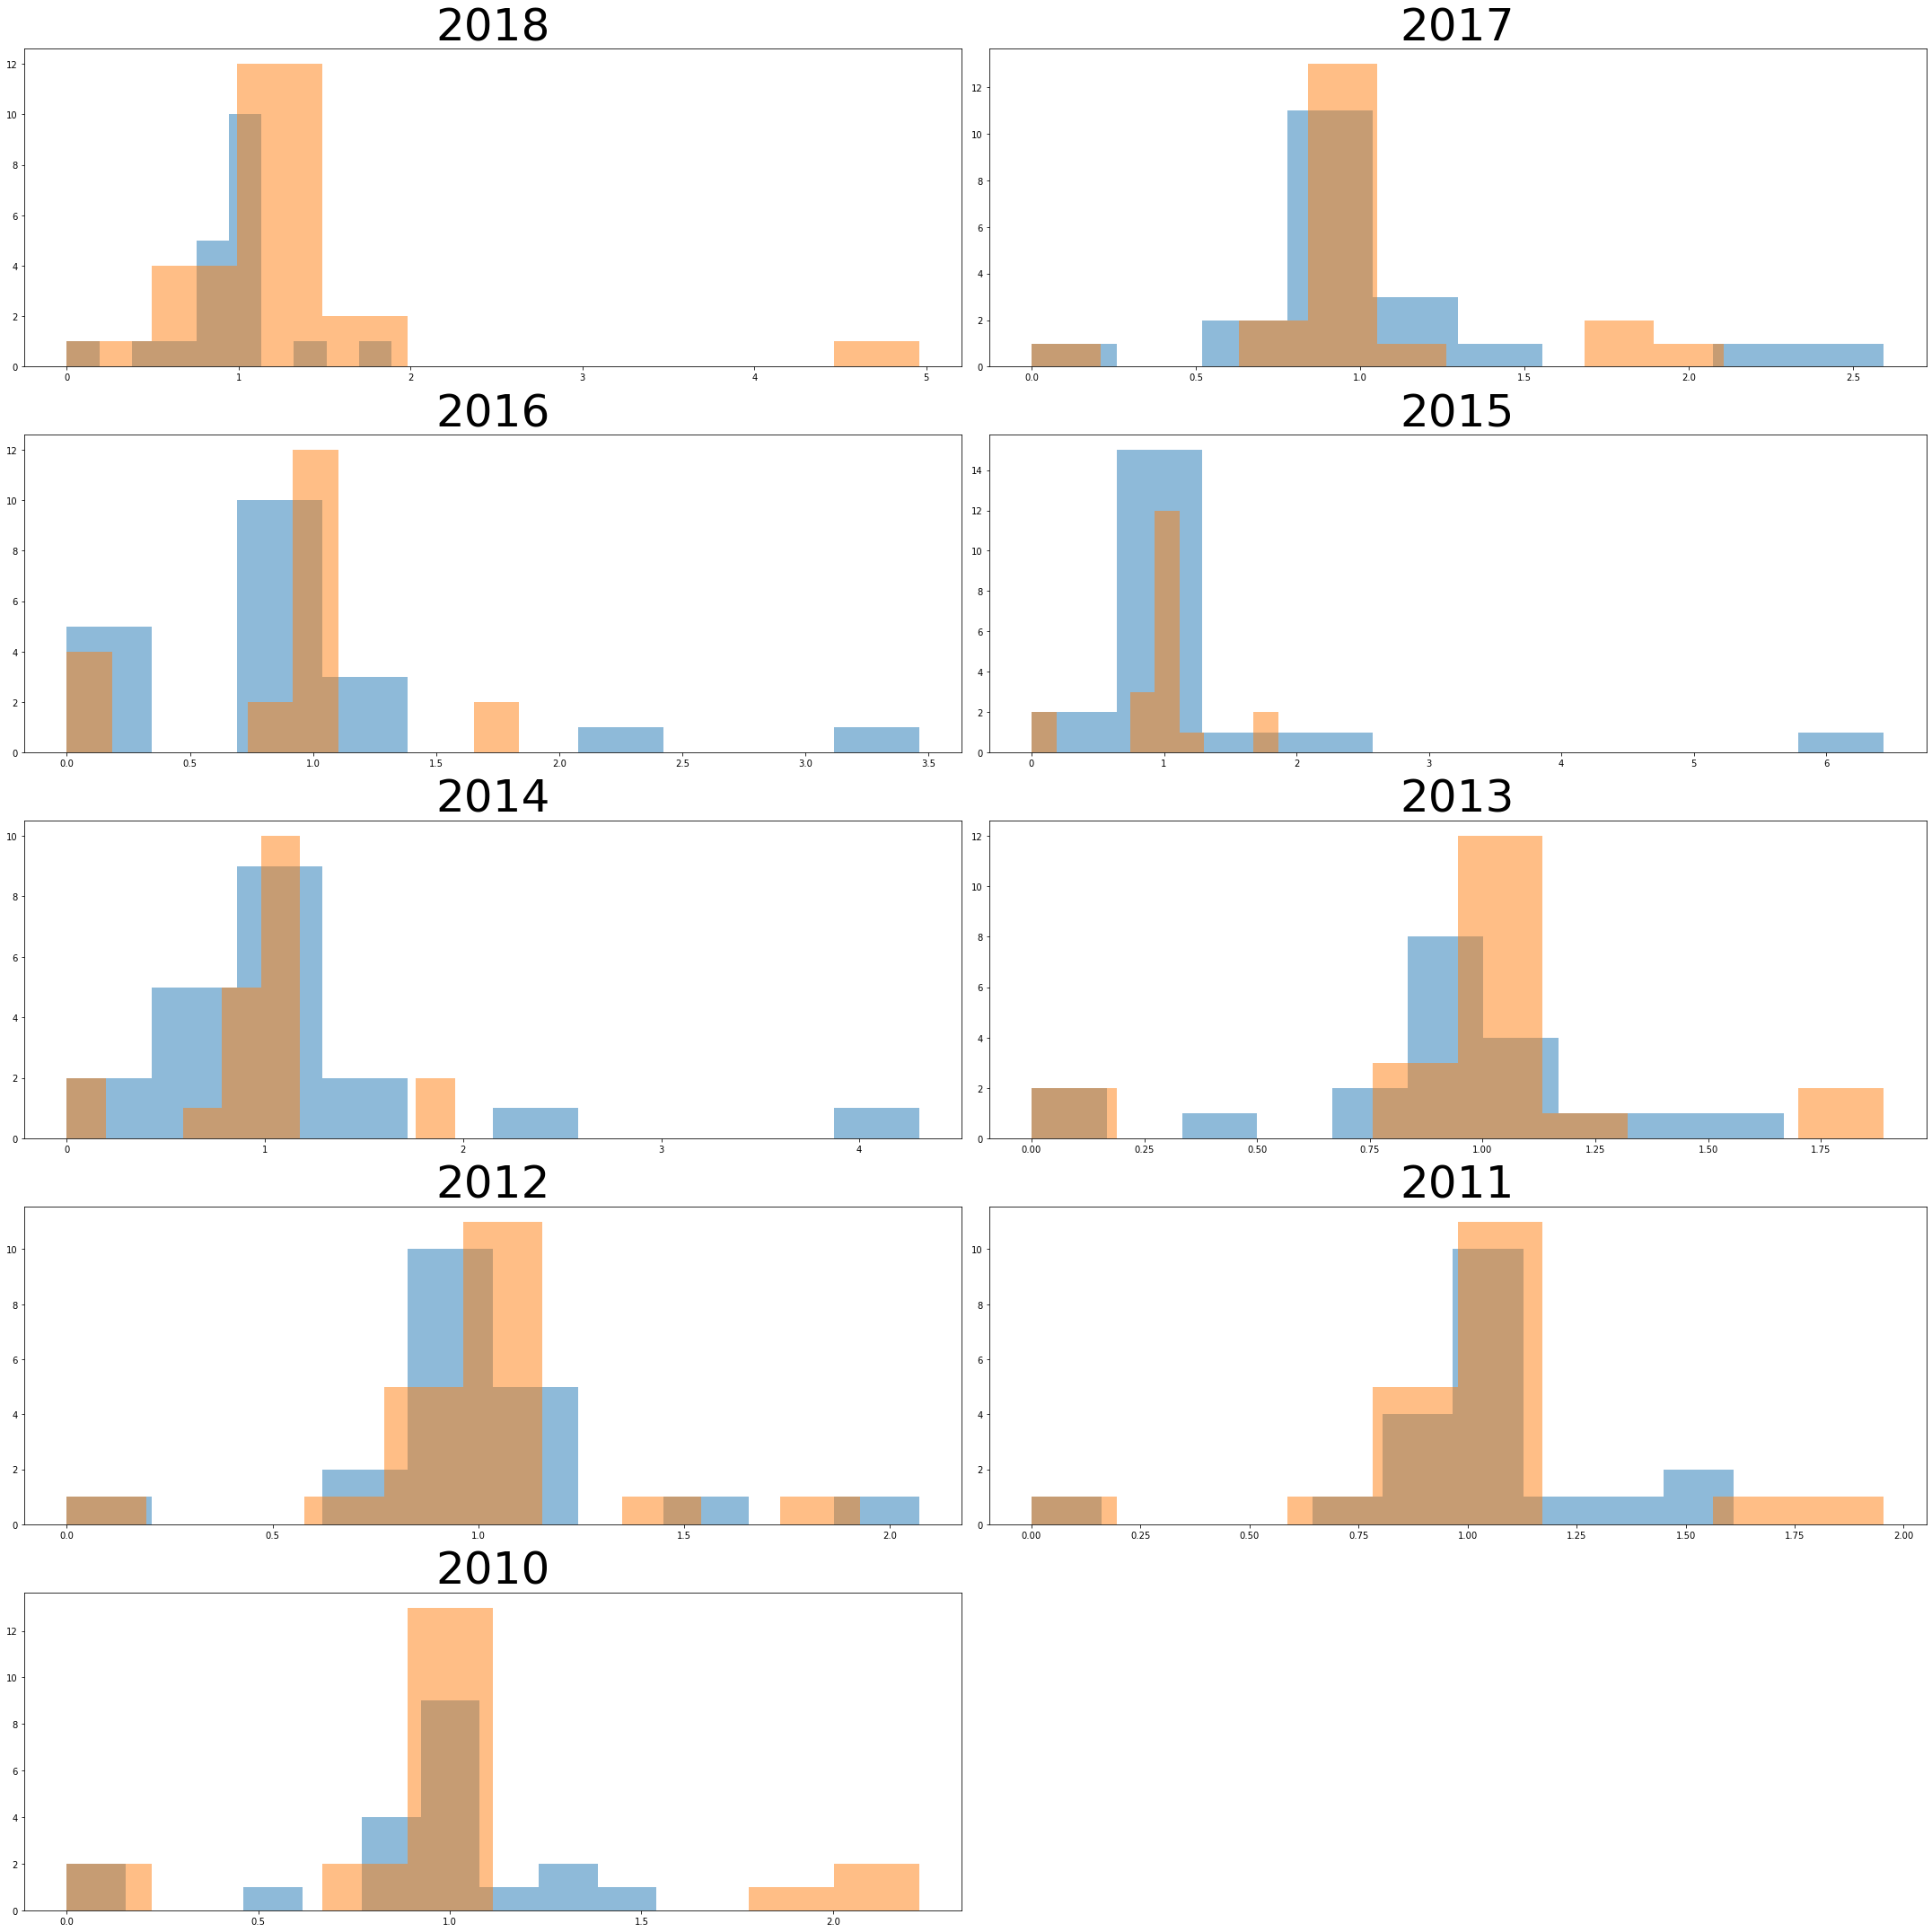

In [43]:
# histogram time
# let's check out the distribution of EtR Ratios for men and women across all 8 years
# this will be 8 different histograms

plt.figure(figsize = (30,30))

plt.subplot(5, 2, 1)
plt.hist(mens_final_df[2018], alpha = 0.5, bins = 10)
plt.hist(womens_final_df[2018], alpha = 0.5, bins = 10)
plt.title("2018", size = 50)

plt.subplot(5, 2, 2)
plt.hist(mens_final_df[2017], alpha = 0.5, bins = 10)
plt.hist(womens_final_df[2017], alpha = 0.5, bins = 10)
plt.title("2017", size = 50)

plt.subplot(5, 2, 3)
plt.hist(mens_final_df[2016], alpha = 0.5, bins = 10)
plt.hist(womens_final_df[2016], alpha = 0.5, bins = 10)
plt.title("2016", size = 50)

plt.subplot(5, 2, 4)
plt.hist(mens_final_df[2015], alpha = 0.5, bins = 10)
plt.hist(womens_final_df[2015], alpha = 0.5, bins = 10)
plt.title("2015", size = 50)

plt.subplot(5, 2, 5)
plt.hist(mens_final_df[2014], alpha = 0.5, bins = 10)
plt.hist(womens_final_df[2014], alpha = 0.5, bins = 10)
plt.title("2014", size = 50)

plt.subplot(5, 2, 6)
plt.hist(mens_final_df[2013], alpha = 0.5, bins = 10)
plt.hist(womens_final_df[2013], alpha = 0.5, bins = 10)
plt.title("2013", size = 50)

plt.subplot(5, 2, 7)
plt.hist(mens_final_df[2012], alpha = 0.5, bins = 10)
plt.hist(womens_final_df[2012], alpha = 0.5, bins = 10)
plt.title("2012", size = 50)

plt.subplot(5, 2, 8)
plt.hist(mens_final_df[2011], alpha = 0.5, bins = 10)
plt.hist(womens_final_df[2011], alpha = 0.5, bins = 10)
plt.title("2011", size = 50)

plt.subplot(5, 2, 9)
plt.hist(mens_final_df[2010], alpha = 0.5, bins = 10)
plt.hist(womens_final_df[2010], alpha = 0.5, bins = 10)
plt.title("2010", size = 50)

plt.tight_layout()
plt.show()

In [44]:
years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

for year in years:
    print("Stats for {}".format(year))
    i = int(year)
    print("Men's: ", stats.describe(mens_final_df[i]))
    print("Women's: ", stats.describe(womens_final_df[i]))
    print("\n")

Stats for 2010
Men's:  DescribeResult(nobs=20, minmax=(0.0, 1.5395771376955374), mean=0.8975605758396767, variance=0.13851630664079542, skewness=-1.100436644656182, kurtosis=1.4687128239338785)
Women's:  DescribeResult(nobs=20, minmax=(0.0, 2.2242929264552354), mean=1.0488690010217934, variance=0.2928956461009261, skewness=0.39500074795094614, kurtosis=1.0208414435888171)


Stats for 2011
Men's:  DescribeResult(nobs=20, minmax=(0.0, 1.6105185742798482), mean=1.0151677639110386, variance=0.10866216257767058, skewness=-0.8998337786509597, kurtosis=3.2110070558681247)
Women's:  DescribeResult(nobs=20, minmax=(0.0, 1.953996545671902), mean=0.9953762430101893, variance=0.12583816020692007, skewness=0.10547517220213441, kurtosis=3.875008273735239)


Stats for 2012
Men's:  DescribeResult(nobs=20, minmax=(0.0, 2.070613536295055), mean=1.0049136791607445, variance=0.14816923338543433, skewness=0.3018282828481655, kurtosis=3.140695028224485)
Women's:  DescribeResult(nobs=20, minmax=(0.0, 1.92697

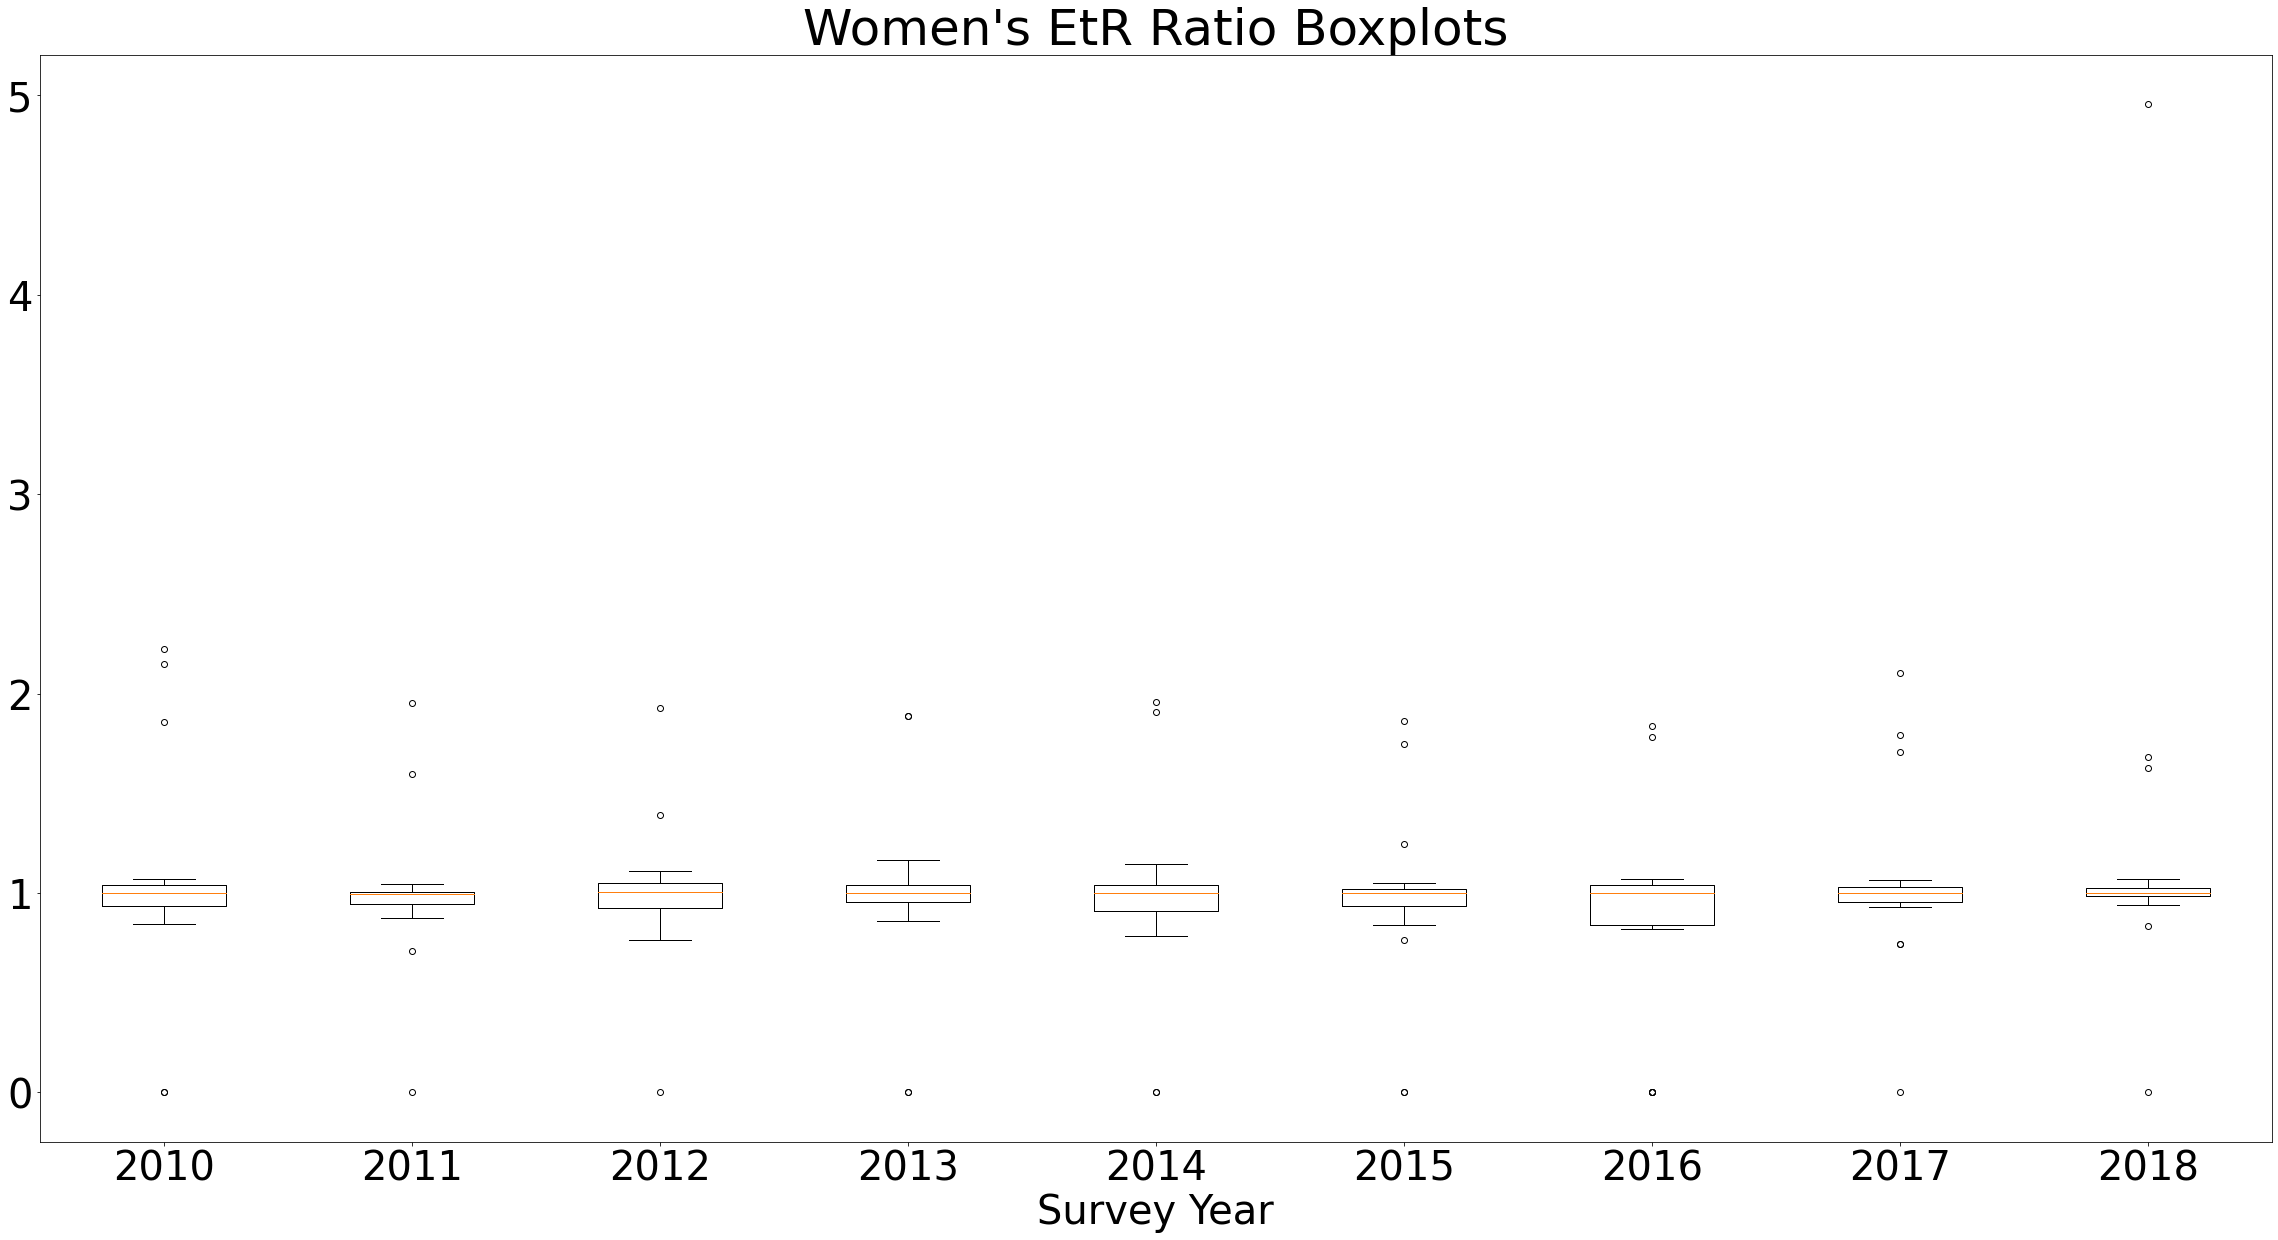

In [45]:
# we have a small sample size for each year, so statistical normality tests may not
# be able to detect much deviation from what would be normal.
# let's look at some boxplots

plt.figure(figsize = (40, 20))
plt.boxplot(womens_final_df)
plt.title("Women's EtR Ratio Boxplots", size = 50)
plt.xlabel('Survey Year', fontsize = 40)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9],
           ["2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018"],
          fontsize = 40)
plt.yticks(fontsize = 40)
plt.show()

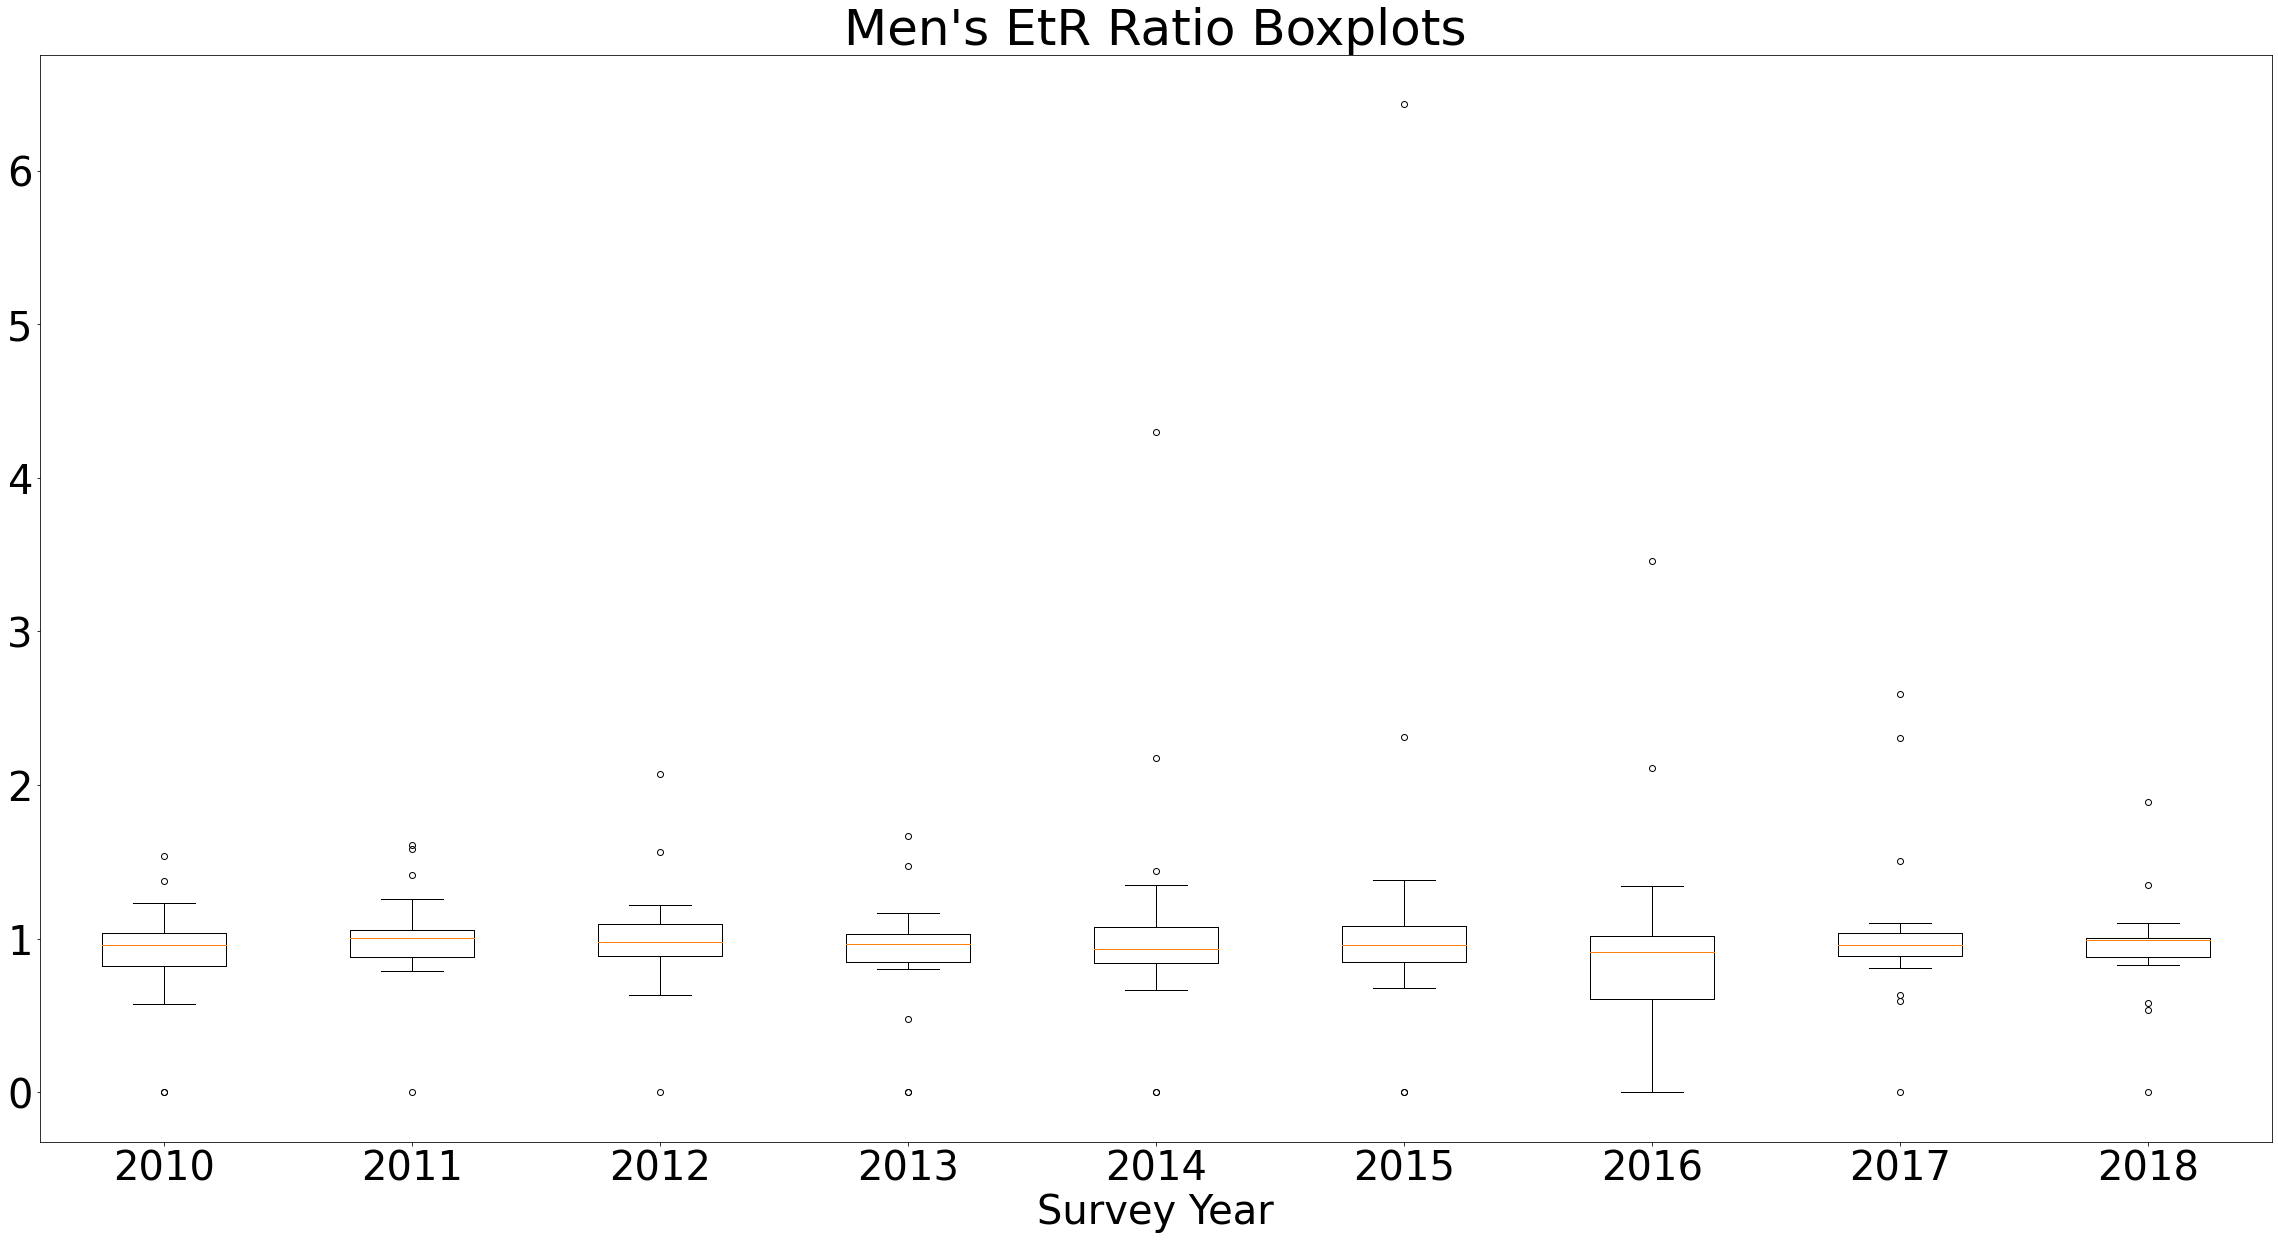

In [46]:
# the 2016 one looks particularly bad, but the others look pretty alright and
# just have like 4 outliers.
# now for the men's

plt.figure(figsize = (40, 20))
plt.boxplot(mens_final_df)
plt.title("Men's EtR Ratio Boxplots", size = 50)
plt.xlabel('Survey Year', fontsize = 40)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9],
           ["2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018"],
          fontsize = 40)
plt.yticks(fontsize = 40)
plt.show()

In [47]:
# once again, looks like 2016 was kind of a weird year, so was 2018.
# furthermore, same as the women's, about 4-5 outliers.
# let's conduct the testing and treat it like normal data.

from scipy.stats import ttest_ind

for year in years:
    i = int(year)
    print("{}: ".format(year), stats.ttest_ind(mens_final_df[i], womens_final_df[i])[1])

2010:  0.3094174202551852
2011:  0.8559443831555594
2012:  0.9517120353344857
2013:  0.5373122510925894
2014:  0.5534523742971595
2015:  0.4430900857659058
2016:  0.8476003868767349
2017:  0.9986902625382009
2018:  0.2616296199990875


In [48]:
# let's treat it as non-normal data

from scipy.stats import kruskal

for year in years:
    i = int(year)
    print("{}: ".format(year), stats.kruskal(mens_final_df[i], womens_final_df[i])[1])

2010:  0.27879954370928184
2011:  0.5247729529244185
2012:  0.7557317349681968
2013:  0.3297001596018927
2014:  0.5514017151681423
2015:  0.5334576910276272
2016:  0.38392799278631207
2017:  0.2850560511518138
2018:  0.23744450206242063
